# This notebook goes with Exercises 1 and 2 on CS161 HW1.
## In it, we'll explore big-Oh notation

Check out https://matplotlib.org/users/pyplot_tutorial.html for a good tutorial on using matplotlib if you are getting hung up on the graphics stuff, although hopefully you shouldn't have to mess with it.

You should not turn in this notebook; instead you should include pictures from it in your problem set.  See HW0 (in the Resources section on the website) for an example of how to include figures like this in LaTeX.

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


#  Exercise 1

### In which we draw a picture convincing us that 3\sqrt(x) + 2 = O( \sqrt(x) ) 


Text(0.5, 1.0, 'T and g')

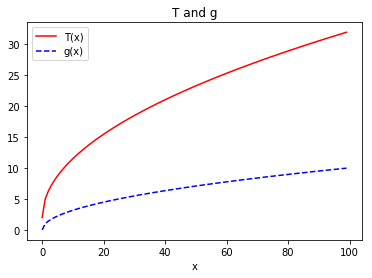

In [3]:
## In this exercise, we'll just make sure we understand the definition of big-Oh.
## Consider the following two functions:

def g(x):
    return np.sqrt(x)

def T(x):
    return 3*np.sqrt(x) + 2

## Let's plot them.
plt.plot([T(x) for x in range(100)], color="red", label="T(x)")
plt.plot([g(x) for x in range(100)], '--', color="blue", label="g(x)")
plt.xlabel("x")
plt.legend()
plt.title("T and g")

#(Press Shift+Enter to execute this cell and make the plot -- you have to execute the cell above first)

Clearly T(x) > g(x) for all x.  However, we claim T(x) = O(g(x)); that is, T is asymptotically no larger than g.

To show this is true, we need to find some c and some n_0 so that:
for all n >= n_0, T(n) <= cg(n). 

By adjusting the values below, find such a c and an n_0, and create a picture that convinces you (and the grader) that T(n) = O(g(n)).  Your plot should be similar to the ones we saw on the slides in Lecture 2.

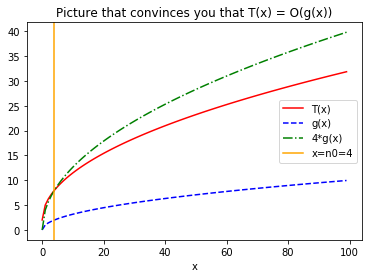

In [5]:
c = 4  # TODO: you will have to change this value
n0 = 4 # TODO: you will have to change this value

# plot our three functions:
plt.plot([T(x) for x in range(100)], color="red", label="T(x)")
plt.plot([g(x) for x in range(100)], '--', color="blue", label="g(x)")
plt.plot([c*g(x) for x in range(100)], '-.', color="green",label=str(c)+"*g(x)")
# plot the vertical line:
plt.axvline(n0, color="orange", label="x=n0=" + str(n0))
# add some text:
plt.xlabel("x")
plt.title("Picture that convinces you that T(x) = O(g(x))")
plt.legend()

# If you want to save the figure that comes out, you can do it by uncommenting the following line:
# plt.savefig("myfigure.png")


### TURN IN: your choice of c, n_0, your plot, and a short (a sentence or two) explanation about why the plot suggests that T(n) = O(g(n)).

#### NOTE: on some systems you can right click the images in the notebook and click "save image as" to get a .png file.  You can then include this in your homework write-up.  You can also use plt.savefig("myfigure.png") to save the image.



# Exercise 2

### In which we try to understand the runtime of a particular algorithm

In [7]:
# Here is a very basic python function, which finds the number of "1"'s that appear in a list.
def numOnes( lst ):
    count = 0
    for x in lst:
        if x == 1:
            count += 1
    return count


## Exercise 2, PART A: 

Just by looking at the code, what is the asymptotic runtime of numOnes on an input list of size n? Give a brief justification of your answer.

### TURN IN: An answer (in big-Oh notation) and a short explanation.


Now, let's sanity-check your answer from Part A.

Below is some code that measures the runtime of numOnes running on some random inputs, and plots the output.

Look through the code below and make sure you understand what it's doing.  Does the output make sense?

Text(0.5, 1.0, 'Running time of numOnes')

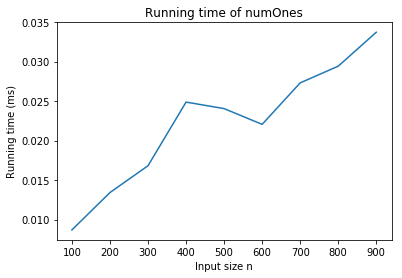

In [8]:
import time
from random import choice

nValues = []
tValues = []
# try lists of length 100, 200, ..., 900:
for n in range(100,1000, 100):
    # do it a few times and average to get a decent idea; this might take a while
    runtime = 0
    numTrials = 60
    for t in range(numTrials):
        lst = [ choice(range(10)) for i in range(n) ] #generate a random list of length n
        start = time.time()
        numOnes( lst )
        end = time.time()
        runtime += (end - start) * 1000  # measure in milliseconds
    runtime = runtime/numTrials # take an average
    nValues.append(n)
    tValues.append(runtime)

plt.plot( nValues, tValues )
plt.xlabel("Input size n")
plt.ylabel("Running time (ms)")
plt.title("Running time of numOnes")


## Exercise 2, PART B:

Use the nValues and tValues computed above to give picture, a la Exercise 1, that convinces you (and the grader) that your answer to part A is correct.

### TURN IN: Your picture, your choices of c and n0, along with a short explanation of what it's showing.


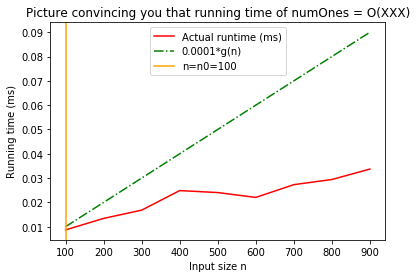

In [13]:
# g(n) is your answer from Part A.
# TODO: modify the answer below to match your answer from Part A.
def g(n):
    return n 

c = 0.0001 # TODO: Modify this appropriately (as in Exercise 1) 
# NOTE: c may need to be pretty small; that's okay.
n0 = 100 # TODO: Modify this appropriately (as in Exercise 1)


# plot the three functions
plt.plot( nValues, tValues, color = "red", label = "Actual runtime (ms)")
plt.plot( nValues, [c*g(n) for n in nValues], '-.', color="green", label = str(c) + "*g(n)")
# plot the vertical line:
plt.axvline(n0, color="orange", label="n=n0=" + str(n0))
# add some text
plt.xlabel("Input size n")
plt.ylabel("Running time (ms)")
plt.title("Picture convincing you that running time of numOnes = O(XXX)")  # TODO: FILL IN YOUR ANSWER HERE
plt.legend()

## Exercise 2, PART C:

How much time do you think it will take to run numOnes on an input of size n=10^15?

### TURN IN: Your answer, in whichever of {ms, seconds, minutes, days, months, years, decades, centuries, ...} makes the most sense, and a short explanation.  You can use either a picture like the one you generated in Part B, or any other method you like that uses the runtime data above.  We do not suggest that you try running numOnes on input that large.